<a href="https://colab.research.google.com/github/UrvashiSingh09/Advance-Data-Science/blob/main/Advance_DataScience_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question 1

In [ ]:
install.packages("dplyr")

library(dplyr)

# Function to detect outliers using IQR method
detect_outliers <- function(data, column) {
  Q1 <- quantile(data[[column]], 0.25, na.rm = TRUE)
  Q3 <- quantile(data[[column]], 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR_value
  upper <- Q3 + 1.5 * IQR_value
  data %>% filter(data[[column]] < lower | data[[column]] > upper)
}

# Function to replace outliers with the median
replace_outliers <- function(data, column) {
  Q1 <- quantile(data[[column]], 0.25, na.rm = TRUE)
  Q3 <- quantile(data[[column]], 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR_value
  upper <- Q3 + 1.5 * IQR_value
  data[[column]] <- ifelse(data[[column]] < lower | data[[column]] > upper, median(data[[column]], na.rm = TRUE), data[[column]])
  data
}

# Example input data
data <- data.frame(Value = c(10, 12, 15, 20, 100, 110, 12, 14, 13, 120, 16, 18, 19, 200))
print("Original Data:")
print(data)

# Detect outliers
print("Outliers detected:")
print(detect_outliers(data, "Value"))

# Replace outliers
cleaned_data <- replace_outliers(data, "Value")
print("Data after replacing outliers:")
print(cleaned_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Original Data:"
   Value
1     10
2     12
3     15
4     20
5    100
6    110
7     12
8     14
9     13
10   120
11    16
12    18
13    19
14   200
[1] "Outliers detected:"
  Value
1   200
[1] "Data after replacing outliers:"
   Value
1     10
2     12
3     15
4     20
5    100
6    110
7     12
8     14
9     13
10   120
11    16
12    18
13    19
14    17


question 2

In [ ]:
handle_invalid_values <- function(data, column, method = "remove", replacement = NA) {
  if (method == "remove") {
    data <- data[!is.na(data[[column]]) & !is.nan(data[[column]]) & is.finite(data[[column]]), ]
  } else if (method == "replace") {
    data[[column]][is.na(data[[column]]) | is.nan(data[[column]]) | !is.finite(data[[column]])] <- replacement
  }
  return(data)
}

# Example usage
data <- data.frame(Value = c(10, NA, 15, Inf, -Inf, NaN, 20, 25))
print("Original Data:")
print(data)

# Removing invalid values
cleaned_data_remove <- handle_invalid_values(data, "Value", method = "remove")
print("Data after removing invalid values:")
print(cleaned_data_remove)

# Replacing invalid values with 0
cleaned_data_replace <- handle_invalid_values(data, "Value", method = "replace", replacement = 0)
print("Data after replacing invalid values with 0:")
print(cleaned_data_replace)


[1] "Original Data:"
  Value
1    10
2    NA
3    15
4   Inf
5  -Inf
6   NaN
7    20
8    25
[1] "Data after removing invalid values:"
[1] 10 15 20 25
[1] "Data after replacing invalid values with 0:"
  Value
1    10
2     0
3    15
4     0
5     0
6     0
7    20
8    25


question 3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



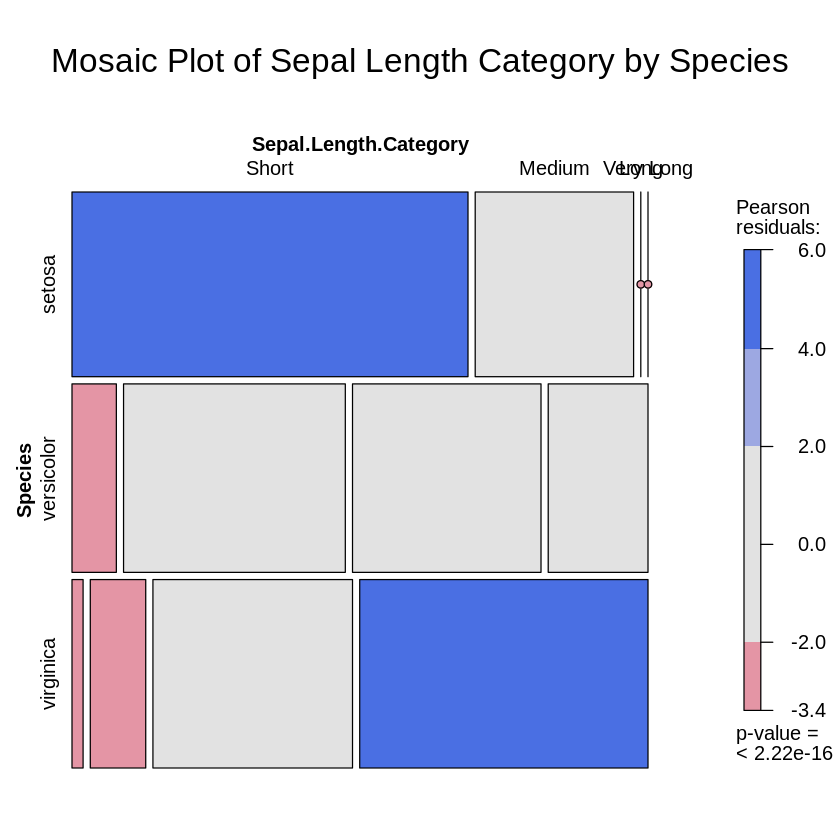

In [ ]:
install.packages("vcd")


# Load necessary libraries
library(vcd)
library(datasets)

# Load the iris dataset
data(iris)

# Categorize Sepal.Length into bins
iris$Sepal.Length.Category <- cut(iris$Sepal.Length,
                                  breaks = quantile(iris$Sepal.Length, probs = seq(0, 1, 0.25), include.lowest = TRUE),
                                  labels = c("Short", "Medium", "Long", "Very Long"))

# Create a mosaic plot
mosaic(~ Species + Sepal.Length.Category, data = iris,
       shade = TRUE, legend = TRUE, main = "Mosaic Plot of Sepal Length Category by Species")


question 4

`geom_smooth()` using formula = 'y ~ x'


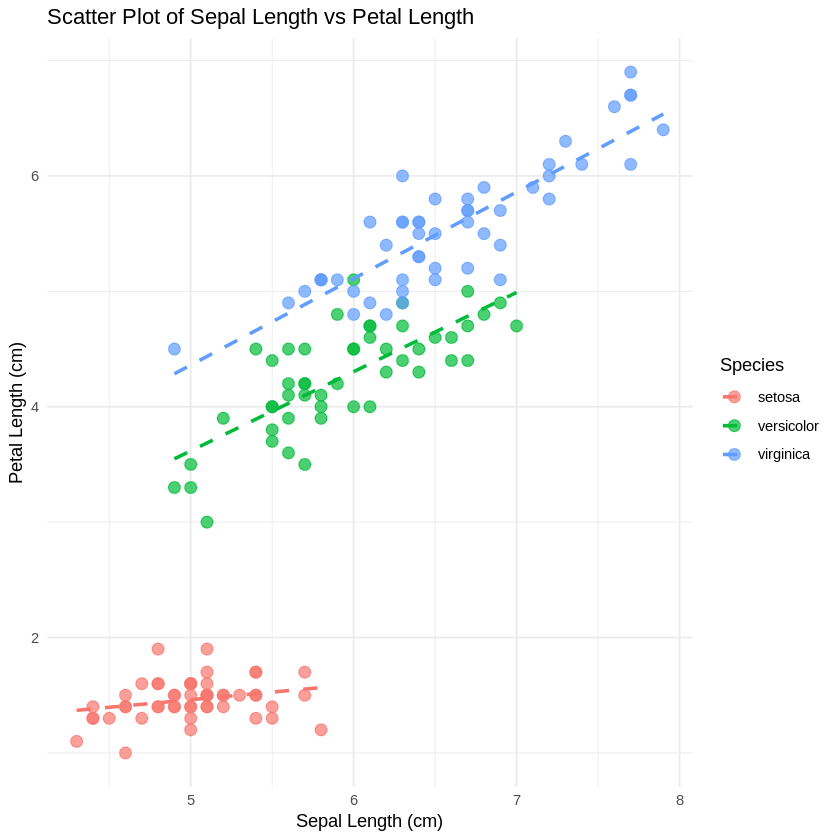

In [ ]:
# Load necessary libraries
library(ggplot2)
library(datasets)

# Load the iris dataset
data(iris)

# Create scatter plot
ggplot(iris, aes(x = Sepal.Length, y = Petal.Length, color = Species)) +
  geom_point(size = 3, alpha = 0.7) +  # Scatter plot points
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Add trend lines
  labs(title = "Scatter Plot of Sepal Length vs Petal Length",
       x = "Sepal Length (cm)",
       y = "Petal Length (cm)") +
  theme_minimal()


question 5


Call:
lm(formula = weight ~ height)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5059 -1.3910  0.2515  0.9794  2.0382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.90893   11.14159  -2.595   0.0319 *  
height        0.62867    0.07657   8.211 3.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.413 on 8 degrees of freedom
Multiple R-squared:  0.8939,	Adjusted R-squared:  0.8807 
F-statistic: 67.42 on 1 and 8 DF,  p-value: 3.619e-05


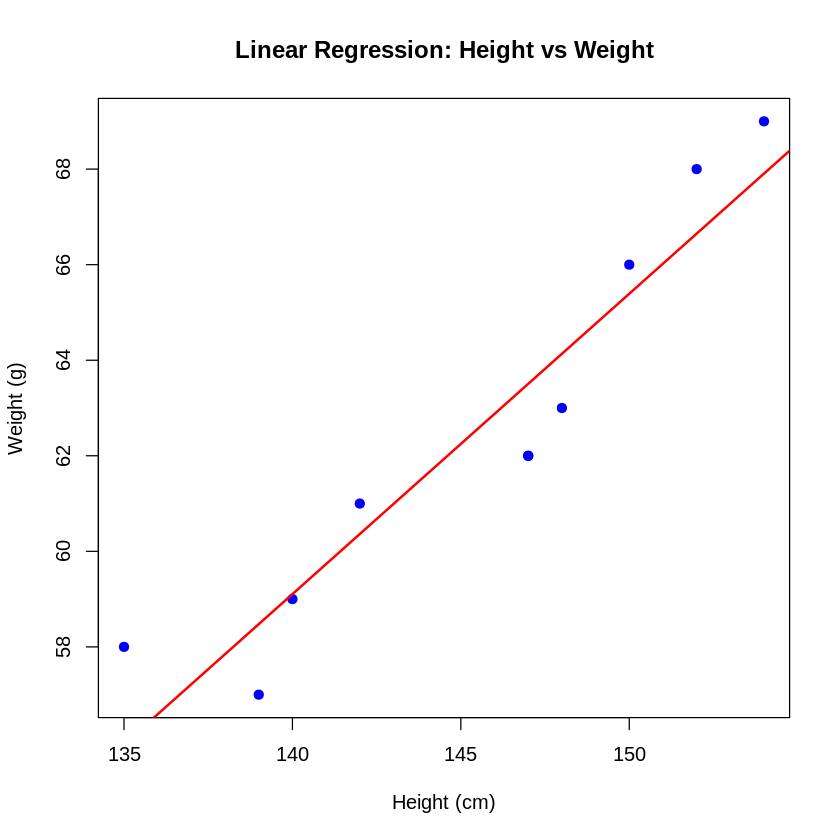

In [ ]:
# Given data
height <- c(140, 142, 150, 147, 139, 152, 154, 135, 148, 147)
weight <- c(59, 61, 66, 62, 57, 68, 69, 58, 63, 62)

# Create a linear regression model
model <- lm(weight ~ height)

# Display summary of the regression model
summary(model)

# Plot the data with regression line
plot(height, weight, main="Linear Regression: Height vs Weight",
     xlab="Height (cm)", ylab="Weight (g)", pch=19, col="blue")
abline(model, col="red", lwd=2)  # Add regression line

question 6

       1 
62.24853 


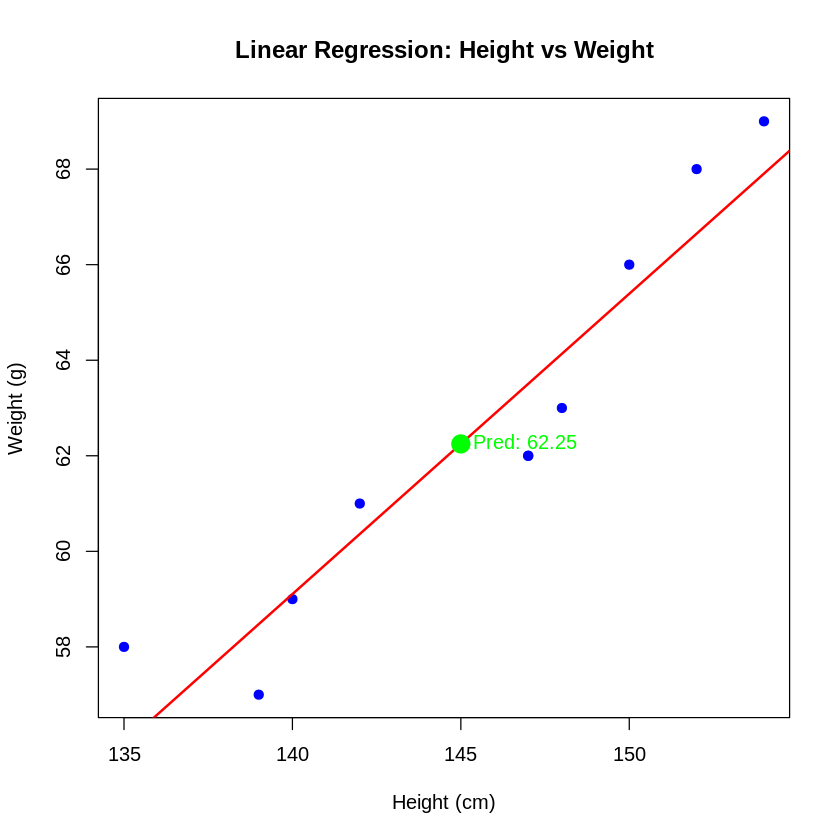

In [ ]:
# Given data
height <- c(140, 142, 150, 147, 139, 152, 154, 135, 148, 147)
weight <- c(59, 61, 66, 62, 57, 68, 69, 58, 63, 62)

# Create a linear regression model
model <- lm(weight ~ height)

# Predict weight for a new height
new_height <- data.frame(height = c(145))  # Change 145 to any height you want
predicted_weight <- predict(model, new_height)
print(predicted_weight)

# Scatter plot with regression line
plot(height, weight, main="Linear Regression: Height vs Weight",
     xlab="Height (cm)", ylab="Weight (g)", pch=19, col="blue")
abline(model, col="red", lwd=2)  # Add regression line

# Add the predicted point to the plot
points(new_height$height, predicted_weight, col="green", pch=19, cex=2)
text(new_height$height, predicted_weight, labels=paste("Pred:", round(predicted_weight, 2)), pos=4, col="green")


question 7


Call:
glm(formula = Species ~ Sepal.Length, family = binomial, data = iris_subset)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.2913     0.3269   0.891    0.373    
Sepal.Length   3.2985     0.6459   5.107 3.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  64.211  on 98  degrees of freedom
AIC: 68.211

Number of Fisher Scoring iterations: 6


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group 2.
Caused by error:
! y values must be 0 <= y <= 1”


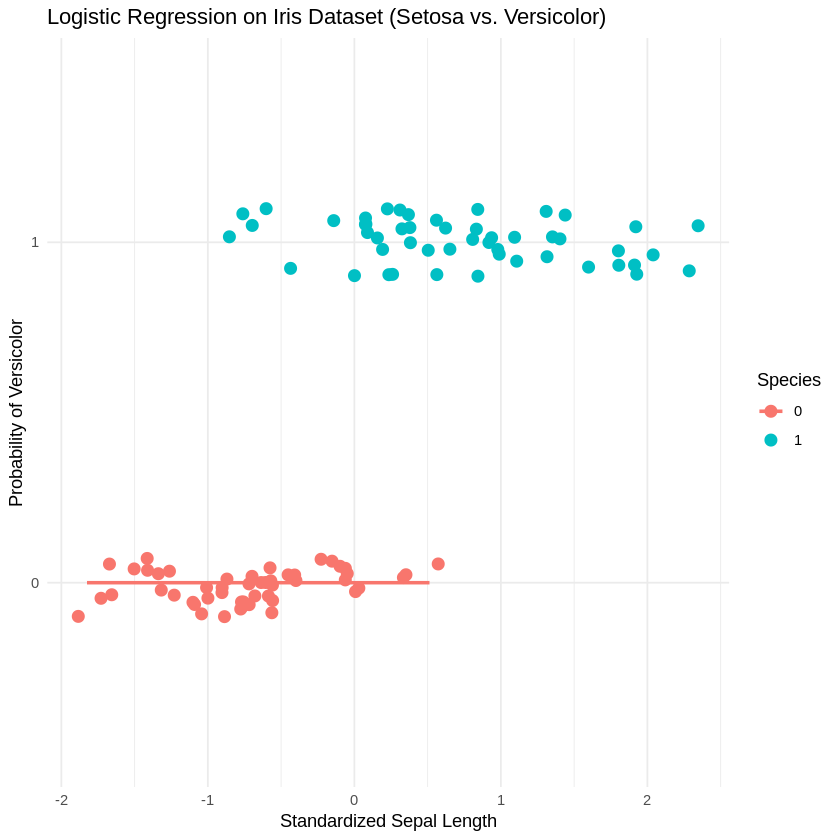

In [ ]:
# Load necessary libraries
library(ggplot2)
library(datasets)

# Load the iris dataset
data(iris)

# Subset for two species: Setosa and Versicolor
iris_subset <- subset(iris, Species %in% c("setosa", "versicolor"))

# Convert Species to a binary factor (0 = Setosa, 1 = Versicolor)
iris_subset$Species <- as.factor(ifelse(iris_subset$Species == "setosa", 0, 1))

# Standardize predictors
iris_subset$Sepal.Length <- scale(iris_subset$Sepal.Length)
iris_subset$Sepal.Width <- scale(iris_subset$Sepal.Width)

# Fit Logistic Regression Model using only one predictor
model <- glm(Species ~ Sepal.Length, data = iris_subset, family = binomial)

# Display model summary
summary(model)

# Predict probabilities
iris_subset$Predicted_Prob <- predict(model, type = "response")

# Scatter plot with decision boundary
ggplot(iris_subset, aes(x = Sepal.Length, y = Species, color = as.factor(Species))) +
  geom_jitter(height = 0.1, size = 3) +
  stat_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(title = "Logistic Regression on Iris Dataset (Setosa vs. Versicolor)",
       x = "Standardized Sepal Length", y = "Probability of Versicolor",
       color = "Species") +
  theme_minimal()


question 8

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Weight_Class ~ Height, family = binomial, data = mice_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -6374.50 5236899.41  -0.001    0.999
Height           43.21   35499.39   0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3460e+01  on 9  degrees of freedom
Residual deviance: 2.3391e-09  on 8  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


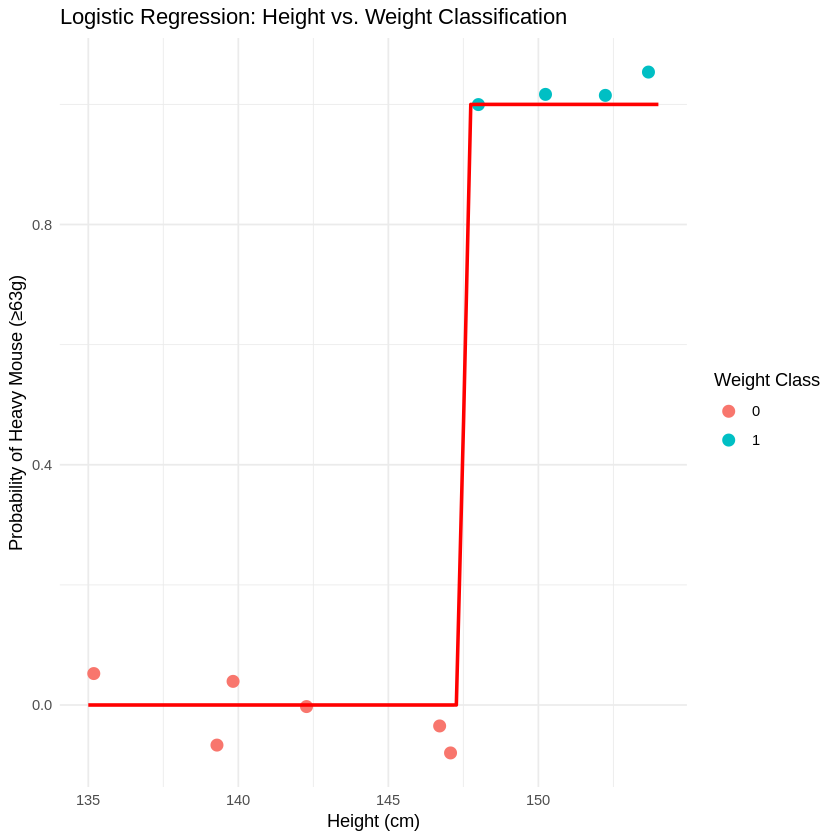

In [ ]:
# Given data
height <- c(140, 142, 150, 147, 139, 152, 154, 135, 148, 147)
weight <- c(59, 61, 66, 62, 57, 68, 69, 58, 63, 62)

# Create binary target variable: 1 if Weight >= 63, else 0
weight_class <- ifelse(weight >= 63, 1, 0)

# Create data frame
mice_data <- data.frame(Height = height, Weight = weight, Weight_Class = weight_class)

# Fit logistic regression model
model <- glm(Weight_Class ~ Height, data = mice_data, family = binomial)

# Display model summary
summary(model)

# Predict probabilities
mice_data$Predicted_Prob <- predict(model, type = "response")

# Plot scatter plot with logistic regression curve
library(ggplot2)
ggplot(mice_data, aes(x = Height, y = Weight_Class)) +
  geom_jitter(aes(color = as.factor(Weight_Class)), height = 0.1, size = 3) +
  stat_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "red") +
  labs(title = "Logistic Regression: Height vs. Weight Classification",
       x = "Height (cm)", y = "Probability of Heavy Mouse (≥63g)",
       color = "Weight Class") +
  theme_minimal()


In [ ]:
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



question 9

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


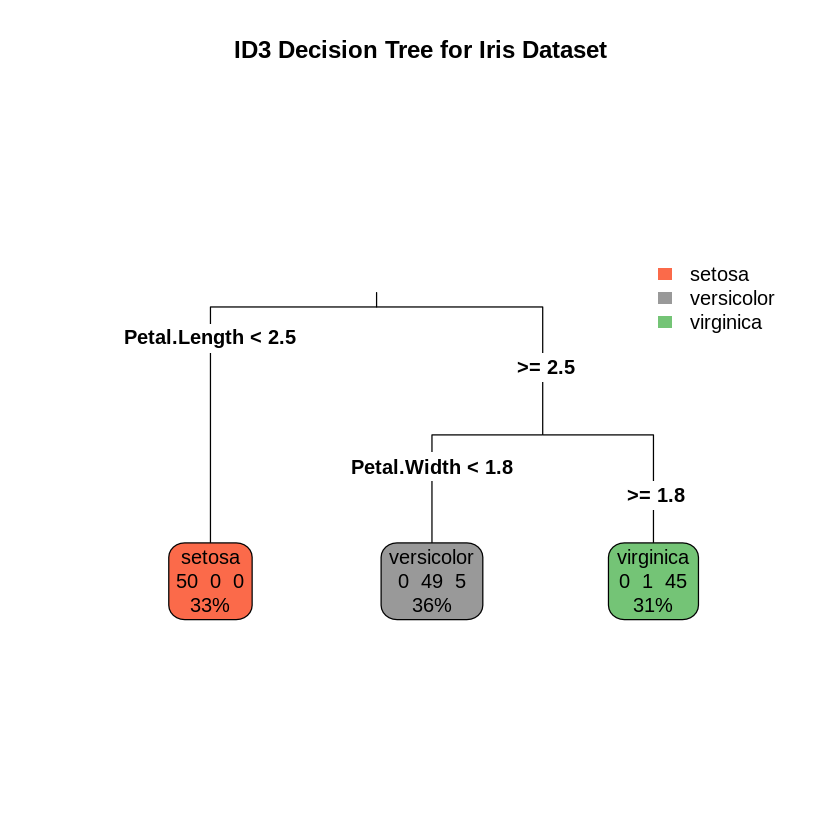

In [ ]:
# Load necessary libraries
library(rpart)
library(rpart.plot)

# Load iris dataset (Example)
data(iris)

# Convert Species to factor (required for classification)
iris$Species <- as.factor(iris$Species)

# Train ID3 Decision Tree model
tree_model <- rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
                     data = iris,
                     method = "class")

# Print tree summary
print(tree_model)

# Visualize the decision tree
rpart.plot(tree_model, main = "ID3 Decision Tree for Iris Dataset", type = 3, extra = 101)

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘prodlim’, ‘ipred’, ‘recipes’




question 10


Loading required package: C50




Call:
C5.0.formula(formula = Species ~ ., data = train_data)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr  1 17:47:39 2025
-------------------------------

Class specified by attribute `outcome'

Read 105 cases (5 attributes) from undefined.data

Decision tree:

Petal.Length <= 1.9: setosa (36)
Petal.Length > 1.9:
:...Petal.Width > 1.7: virginica (34/1)
    Petal.Width <= 1.7:
    :...Petal.Length <= 4.9: versicolor (31/1)
        Petal.Length > 4.9: virginica (4/1)


Evaluation on training data (105 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4    3( 2.9%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    36                (a): class setosa
	          30     2    (b): class versicolor
	           1    36    (c): class virginica


	Attribute usage:

	100.00%	Petal.Length
	 65.71%	Petal.Width


Time: 0.0 secs


Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         0
  virginica       0          1        13

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9664          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9444           1.0000
Specificity                 1.0000            1.0000           0.9688
Pos Pred Value              1.0000            1.0000           0.9286
Neg Pred Value              1.0000            0.9643           1.0000
P

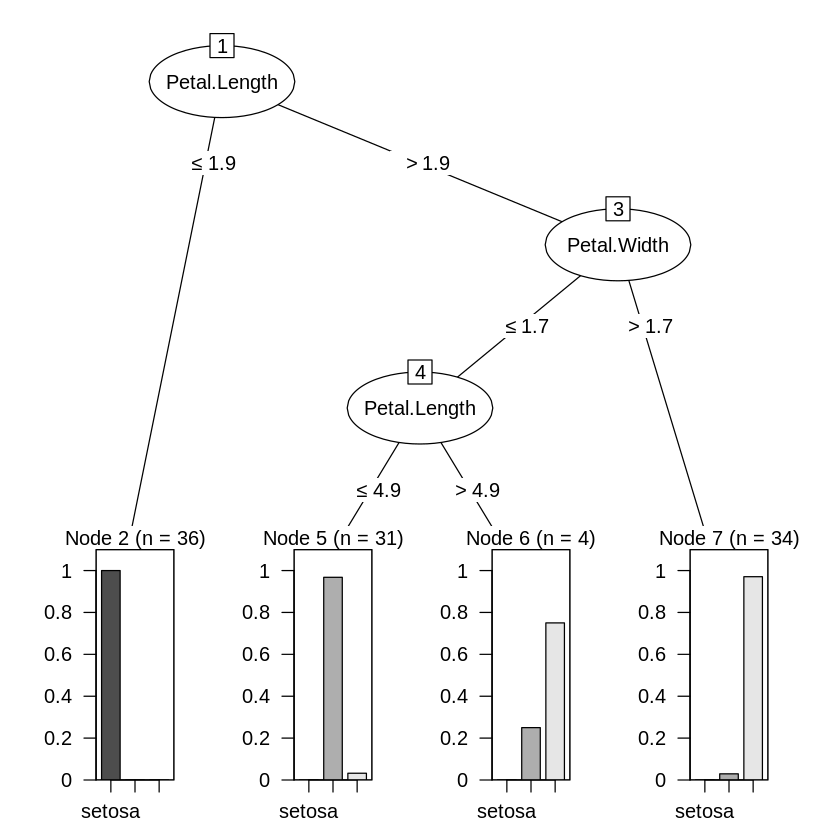

In [ ]:
# Install the C50 package if not installed
if (!require("C50")) install.packages("C50", dependencies = TRUE)

# Load necessary libraries
library(C50)

# Load the iris dataset (Example)
data(iris)

# Convert Species to a factor (required for classification)
iris$Species <- as.factor(iris$Species)

# Split dataset into training (70%) and testing (30%)
set.seed(123)  # For reproducibility
train_index <- sample(1:nrow(iris), 0.7 * nrow(iris))
train_data <- iris[train_index, ]
test_data  <- iris[-train_index, ]

# Train C4.5 Decision Tree model
c45_model <- C5.0(Species ~ ., data = train_data)

# Print model summary
summary(c45_model)

# Visualize the decision tree
plot(c45_model)

# Make predictions
predictions <- predict(c45_model, test_data)

# Evaluate model performance
library(caret)
confusionMatrix(predictions, test_data$Species)


question 11

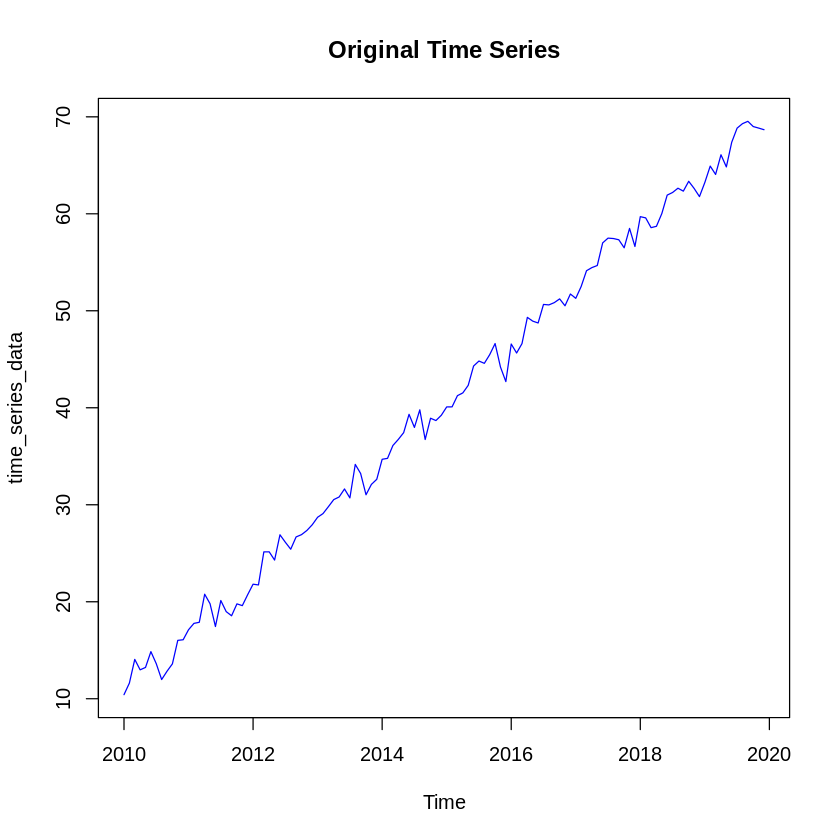

,time,original,trend,seasonal,random
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010.000,10.41895,NA,-0.07275579,NA
2,2010.083,11.61129,NA,-0.27090060,NA
3,2010.167,14.05620,NA,0.02909726,NA
4,2010.250,12.97981,NA,0.59112578,NA
5,2010.333,13.22776,NA,0.06891662,NA
6,2010.417,14.85618,NA,0.86488799,NA


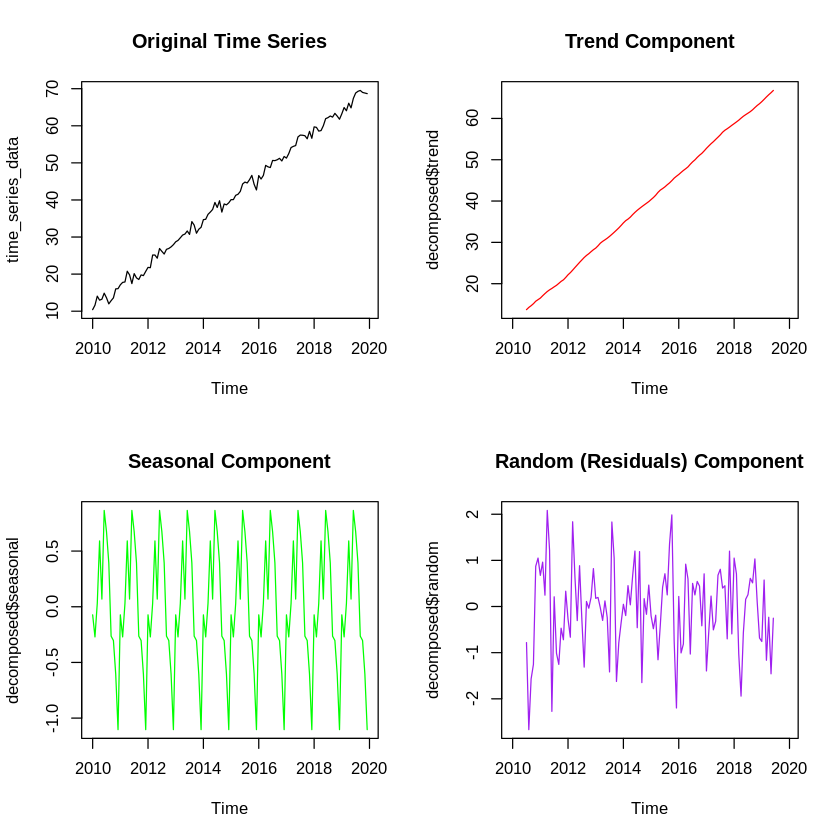

In [ ]:
# Load necessary libraries
library(ggplot2)

# Example: Create a sample time series data (monthly data)
set.seed(123)  # Set seed for reproducibility
time_series_data <- ts(
  data = 10 + 0.5 * (1:120) + sin(1:120 / 2) + rnorm(120),
  start = c(2010, 1),  # Start from January 2010
  frequency = 12  # Monthly data (12 months per year)
)

# Plot the original time series
plot(time_series_data, main = "Original Time Series", col = "blue")

# Decompose the time series into trend, seasonal, and random components
decomposed <- decompose(time_series_data)

# Plot the decomposed components
par(mfrow = c(2, 2))  # Arrange plots in a 2x2 grid
plot(time_series_data, main = "Original Time Series")
plot(decomposed$trend, main = "Trend Component", col = "red")
plot(decomposed$seasonal, main = "Seasonal Component", col = "green")
plot(decomposed$random, main = "Random (Residuals) Component", col = "purple")

# Reset the plotting layout
par(mfrow = c(1, 1))

# Optionally, combine and view all components together
components_df <- data.frame(
  time = time(time_series_data),
  original = as.numeric(time_series_data),
  trend = as.numeric(decomposed$trend),
  seasonal = as.numeric(decomposed$seasonal),
  random = as.numeric(decomposed$random)
)

head(components_df)


question 12

In [ ]:
# Load necessary libraries
library(ggplot2)

# Function for Single Exponential Smoothing (SES)
single_exp_smoothing <- function(ts_data, alpha) {
  n <- length(ts_data)
  forecast_values <- numeric(n)  # To store forecasted values
  forecast_values[1] <- ts_data[1]  # Initial forecast is the first data point

# Apply SES formula iteratively for each time point
  for (t in 2:n) {
    forecast_values[t] <- alpha * ts_data[t-1] + (1 - alpha) * forecast_values[t-1]
  }

  return(forecast_values)
}

# Example: Generate a synthetic time series data
set.seed(123)  # Set seed for reproducibility
time_series_data <- ts(10 + 0.5 * (1:50) + rnorm(50), start = c(2020, 1), frequency = 12)

# Plot the original time series data
plot(time_series_data, main = "Original Time Series", col = "blue", ylab = "Value", xlab = "Time")

# Define smoothing parameter alpha (0 < alpha < 1)
alpha <- 0.3

# Apply Single Exponential Smoothing
forecast_values <- single_exp_smoothing(time_series_data, alpha)

# Plot the original time series data with the smoothed forecast
plot(time_series_data, main = "Single Exponential Smoothing Forecast", col = "blue", ylab = "Value", xlab = "Time")
lines(forecast_values, col = "red", lwd = 2)  # Add the forecast as a red line

# Show forecast values
forecast_values


question 13

In [ ]:
# Load necessary libraries
library(ggplot2)

# Generate synthetic data
set.seed(123)  # For reproducibility
data <- data.frame(
  x = c(rnorm(50, mean = 5, sd = 1), rnorm(50, mean = 10, sd = 1)),
  y = c(rnorm(50, mean = 5, sd = 1), rnorm(50, mean = 10, sd = 1))
)

# Determine the optimal number of clusters using the Elbow method
wss <- numeric(10)  # Store within-cluster sum of squares
for (k in 1:10) {
  wss[k] <- kmeans(data, centers = k, nstart = 25)$tot.withinss
}

# Plot the Elbow method
plot(1:10, wss, type = "b", pch = 19, frame = FALSE,
     xlab = "Number of Clusters (k)", ylab = "Total Within-Cluster Sum of Squares",
     main = "Elbow Method for Optimal K")

# Apply K-Means Clustering (assuming 2 clusters from the elbow method)
set.seed(123)
kmeans_result <- kmeans(data, centers = 2, nstart = 25)

# Add cluster labels to the data
data$cluster <- as.factor(kmeans_result$cluster)

# Visualize the clusters
ggplot(data, aes(x, y, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering", x = "X-axis", y = "Y-axis") +
  theme_minimal()



question 14

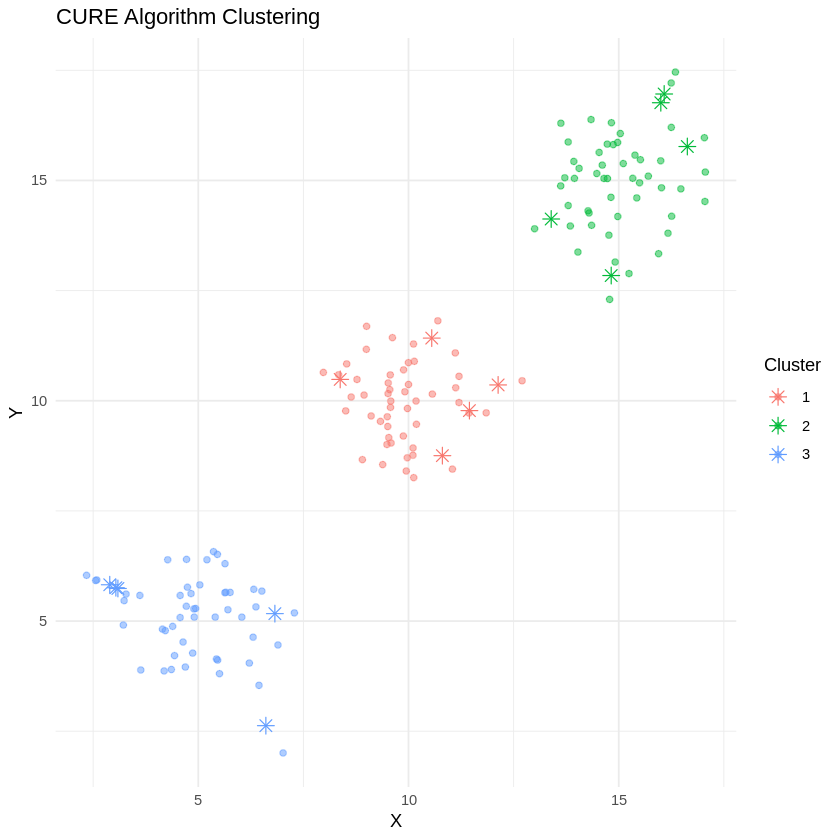

In [ ]:
# Load required libraries
library(ggplot2)
library(cluster)

# Generate synthetic dataset (or use real dataset)
set.seed(42)
n <- 100
x <- rbind(
  matrix(rnorm(n, mean = 5, sd = 1), ncol = 2),
  matrix(rnorm(n, mean = 10, sd = 1), ncol = 2),
  matrix(rnorm(n, mean = 15, sd = 1), ncol = 2)
)
df <- as.data.frame(x)
colnames(df) <- c("X", "Y")

# Function to calculate distance matrix
calc_distance <- function(data) {
  return(as.matrix(dist(data)))  # Ensure it returns a numeric matrix
}

# Function to find k representative points in each cluster
find_representative_points <- function(cluster, k) {
  centroid <- colMeans(cluster)
  distances <- apply(cluster, 1, function(point) sqrt(sum((point - centroid)^2)))
  reps <- cluster[order(-distances), , drop = FALSE][1:k, ]  # Select k farthest points
  return(reps)
}

# CURE Algorithm Implementation
cure_clustering <- function(data, num_clusters = 3, num_reps = 5, shrink_factor = 0.2) {
  clusters <- lapply(1:nrow(data), function(i) as.matrix(data[i, ]))  # Ensure numeric matrices

  while (length(clusters) > num_clusters) {
    # Compute pairwise distance matrix based on cluster centroids
    dist_matrix <- calc_distance(do.call(rbind, lapply(clusters, function(c) colMeans(as.matrix(c)))))

    # Find the closest clusters to merge
    dist_matrix[lower.tri(dist_matrix, diag = TRUE)] <- Inf
    merge_indices <- which(dist_matrix == min(dist_matrix), arr.ind = TRUE)[1, ]

    # Merge the two closest clusters
    merged_cluster <- rbind(clusters[[merge_indices[1]]], clusters[[merge_indices[2]]])
    clusters <- clusters[-merge_indices]  # Remove old clusters
    clusters[[length(clusters) + 1]] <- merged_cluster  # Add new merged cluster
  }

  # Assign representative points and shrink them towards centroid
  final_clusters <- lapply(clusters, function(cluster) {
    cluster_matrix <- as.matrix(cluster)
    reps <- find_representative_points(cluster_matrix, num_reps)
    centroid <- colMeans(cluster_matrix)
    shrunk_reps <- reps - shrink_factor * (reps - centroid)
    return(list(cluster = cluster_matrix, reps = shrunk_reps))
  })

  return(final_clusters)
}

# Run CURE algorithm
cure_clusters <- cure_clustering(df, num_clusters = 3, num_reps = 5, shrink_factor = 0.2)

# Plot results
plot_clusters <- function(clusters) {
  cluster_data <- do.call(rbind, lapply(seq_along(clusters), function(i) {
    data.frame(X = clusters[[i]]$cluster[,1], Y = clusters[[i]]$cluster[,2], Cluster = i)
  }))

  rep_data <- do.call(rbind, lapply(seq_along(clusters), function(i) {
    data.frame(X = clusters[[i]]$reps[,1], Y = clusters[[i]]$reps[,2], Cluster = i)
  }))

  ggplot() +
    geom_point(data = cluster_data, aes(x = X, y = Y, color = as.factor(Cluster)), alpha = 0.5) +
    geom_point(data = rep_data, aes(x = X, y = Y, color = as.factor(Cluster)), shape = 8, size = 3) +
    labs(title = "CURE Algorithm Clustering", color = "Cluster") +
    theme_minimal()
}

# Visualize Clusters
plot_clusters(cure_clusters)
